In [22]:
import fitsio
import lusee
import healpy as hp
import matplotlib
font = {'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)
import scipy.linalg as la


In [42]:
antenna_sim_path = "../../Drive/AntennaResponse/Exported/"
antenna_fname = "feko_bnl_monopole_1m_75deg.fits"
B = lusee.LBeam(antenna_sim_path+'/'+antenna_fname)
freq=np.arange(1,51)

Text(0, 0.5, '$f_{ground}$')

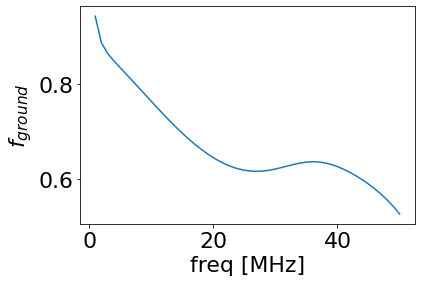

In [47]:
plt.plot(freq,B.f_ground)
plt.xlabel('freq [MHz]')
plt.ylabel('$f_{ground}$')

In [7]:
P=B.power()
w = np.sin(B.theta)

In [14]:
norm = (P*w[None,:,None]).sum(axis=(1,2))/B.f_ground
Pnorm = P/norm[:,None,None]

In [49]:
C=np.zeros((50,50))
sw = 0
for i,phi in enumerate(B.phi):
    for j, theta in enumerate(B.theta):
        v = Pnorm[:,j,i]
        #plt.plot(v,alpha=0.1)
        cw = np.sin(theta)
        C+=np.outer(v,v)*cw
        sw +=cw
        
C/=sw
eva,eve = la.eig(C)   
    

Text(0, 0.5, 'response')

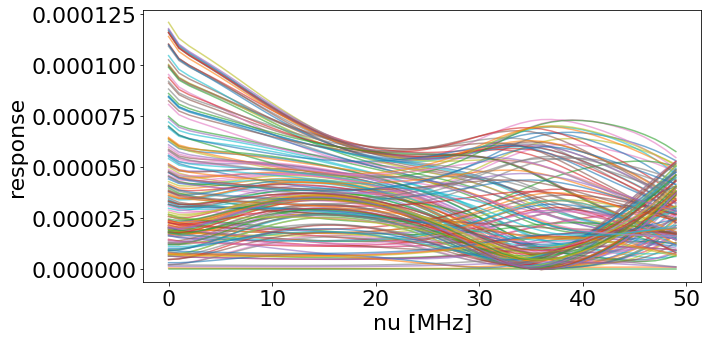

In [68]:
plt.figure(figsize=(10,5))
for i,phi in enumerate(B.phi):
    for j, theta in enumerate(B.theta):
        if (np.random.uniform(0,1)>0.995):
            v = Pnorm[:,j,i]
            plt.plot(v,alpha=0.6)
plt.xlabel("nu [MHz]")
plt.ylabel('response')

/opt/conda/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


[]

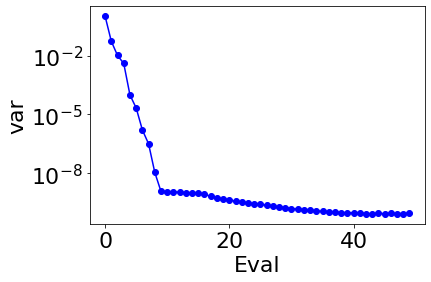

In [36]:
plt.plot(eva/eva[0],'bo-')
plt.xlabel("Eval")
plt.ylabel("var")
plt.semilogy()

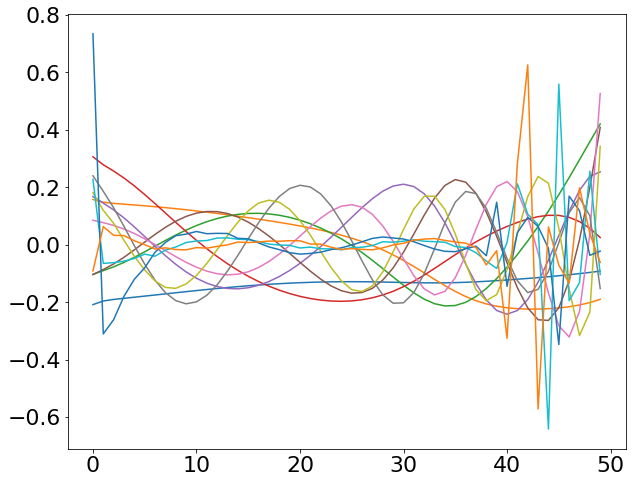

In [38]:
plt.figure(figsize=(10,8))
for i in range(12):
    plt.plot(eve[:,i], label=str(i))
#plt.legend()

In [35]:
eva

array([7.23607708e-08+0.j, 3.83330032e-09+0.j, 7.25237354e-10+0.j,
       2.86013289e-10+0.j, 7.09170593e-12+0.j, 1.54018885e-12+0.j,
       1.17678930e-13+0.j, 2.29133723e-14+0.j, 8.02764319e-16+0.j,
       8.60624663e-17+0.j, 8.39369449e-17+0.j, 8.10711878e-17+0.j,
       7.92785846e-17+0.j, 7.23317096e-17+0.j, 7.20204362e-17+0.j,
       6.91281340e-17+0.j, 6.28395569e-17+0.j, 4.83963303e-17+0.j,
       4.07394249e-17+0.j, 3.45572818e-17+0.j, 3.30016678e-17+0.j,
       2.67597580e-17+0.j, 2.42527221e-17+0.j, 2.19700059e-17+0.j,
       1.97823574e-17+0.j, 1.88831965e-17+0.j, 1.74070315e-17+0.j,
       1.52220539e-17+0.j, 1.38947474e-17+0.j, 1.27077018e-17+0.j,
       1.15315220e-17+0.j, 1.09006814e-17+0.j, 1.02071005e-17+0.j,
       9.50431442e-18+0.j, 8.76062983e-18+0.j, 8.27915836e-18+0.j,
       7.83227568e-18+0.j, 7.47891672e-18+0.j, 7.18765600e-18+0.j,
       7.10589090e-18+0.j, 6.97652960e-18+0.j, 6.92896737e-18+0.j,
       6.20362478e-18+0.j, 6.26053685e-18+0.j, 6.73256148e-18+

(1e-05, 0.01)

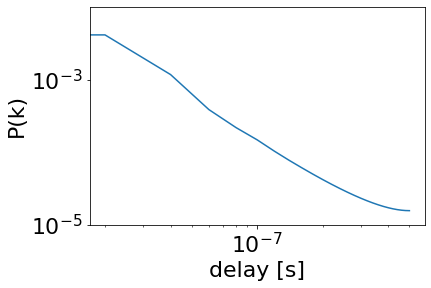

In [89]:
Pk = np.zeros(26)
for i,phi in enumerate(B.phi):
    for j, theta in enumerate(B.theta):
        v = Pnorm[:,j,i]
        Pk += np.abs(np.fft.rfft(v)**2)
k = 1/50e6*np.arange(26)
plt.plot(k,Pk)  
plt.semilogx()
plt.xlabel("delay [s]")
plt.ylabel("P(k)")
plt.loglog()
plt.ylim(1e-5,1e-2)